In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os

#os.chdir("..")
# Move train and test data into same folder as code

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print train.shape
print test.shape

(891, 12)
(418, 11)


In [4]:
print train.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print train.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


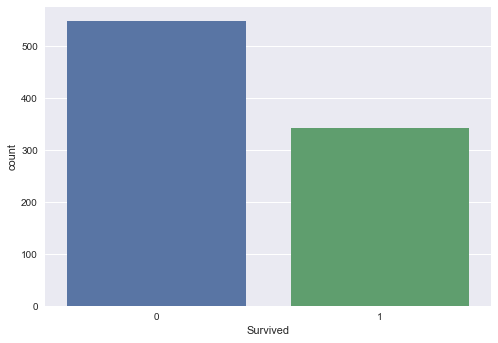

In [6]:
# Analyze Survived versus other features
sns.countplot(x = 'Survived', data = train)

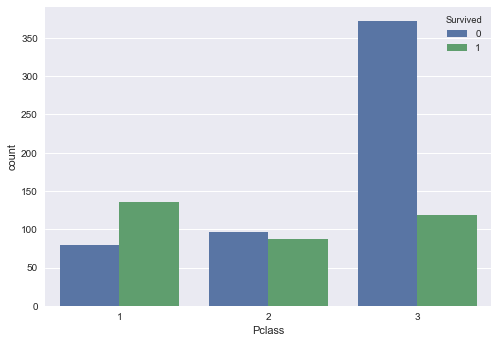

In [7]:
# Analyze relationship of survived and pclass
sns.countplot(x = 'Pclass', data = train, hue = 'Survived')

In [8]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

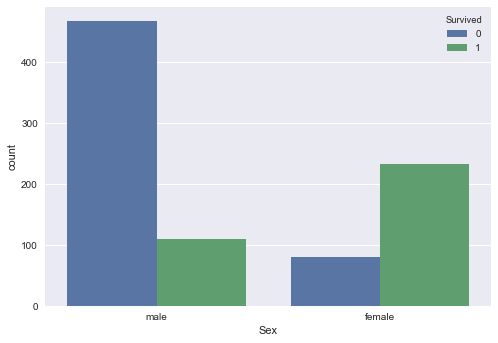

In [9]:
# Which gender has the best chance of surviving
sns.countplot(x = 'Sex', data = train, hue = 'Survived')

In [10]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
combineTrainTest = train.append(test)

In [12]:
# Extract title from name
combineTrainTest['Title'] = combineTrainTest['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split('.')[0])

In [13]:
combineTrainTest['Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Capt              1
 Lady              1
 the Countess      1
 Jonkheer          1
 Don               1
 Dona              1
 Mme               1
 Sir               1
Name: Title, dtype: int64

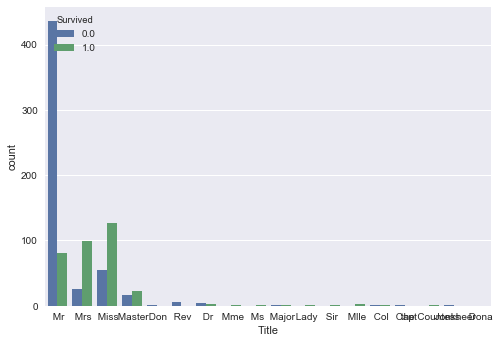

In [14]:
sns.countplot(x = 'Title', data = combineTrainTest, hue = 'Survived')

In [15]:
train['Survived'].groupby(train['Title']).mean()

KeyError: 'Title'

In [16]:
# Look at age range of each title
sns.set(rc={"figure.figsize": (20, 4)})
sns.boxplot(x = 'Title', y = 'Age', data = train)

ValueError: Could not interpret input 'Title'

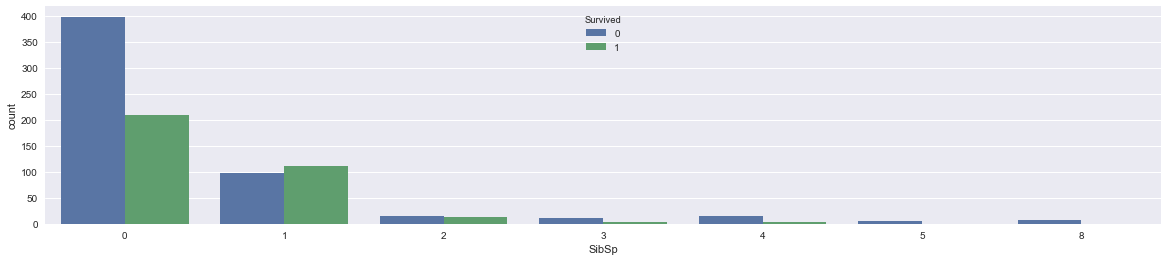

In [17]:
sns.countplot(x = 'SibSp', data = train, hue = 'Survived')

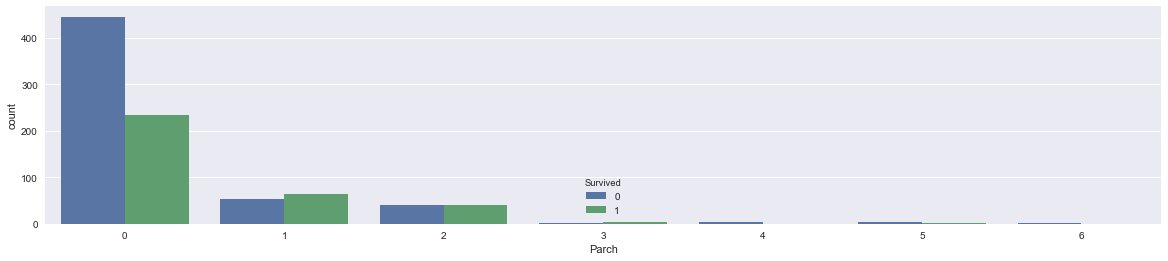

In [18]:
sns.countplot(x = 'Parch', data = train, hue = 'Survived')

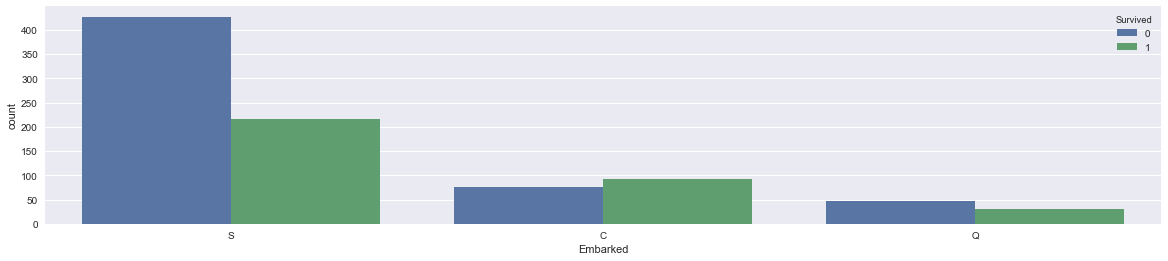

In [19]:
sns.countplot(x = 'Embarked', data = train, hue = 'Survived')

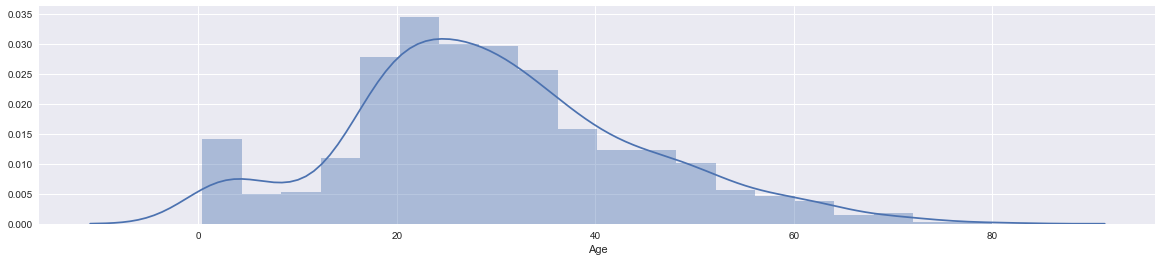

In [20]:
sns.distplot(train['Age'].dropna())

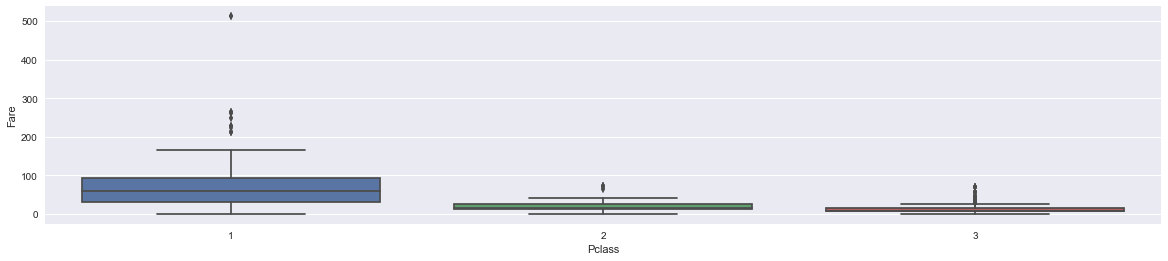

In [21]:
sns.boxplot(x = 'Pclass', y = 'Fare', data = train)

In [22]:
# Check for nulls in each columns
print train.isnull().sum()
print ""
print test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


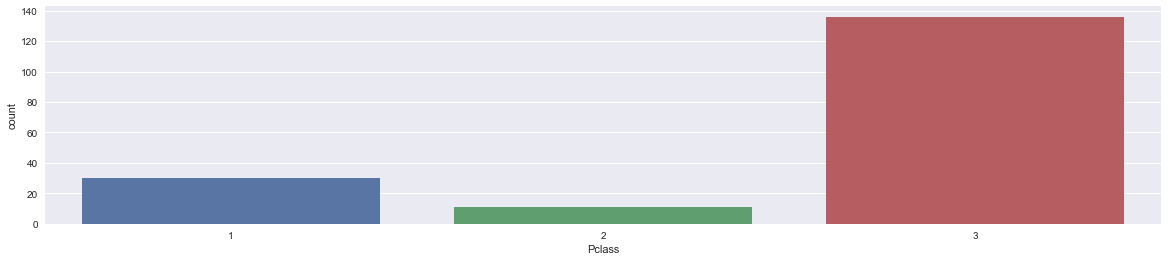

In [23]:
# Which class has most nulls
sns.countplot(x = 'Pclass', data = train[train['Age'].isnull()])

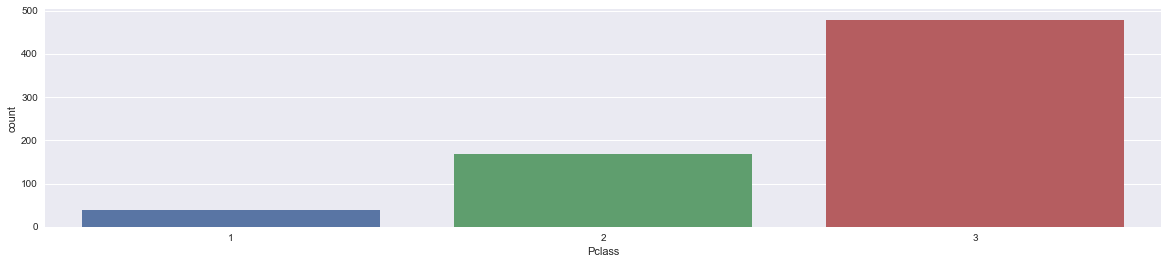

In [24]:
sns.countplot(x = 'Pclass', data = train[train['Cabin'].isnull()])

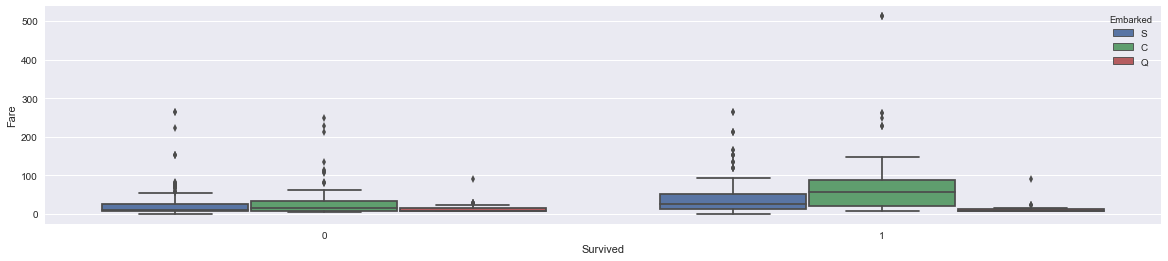

In [25]:
sns.boxplot(x = 'Survived', y = 'Fare', hue = 'Embarked', data = train )

In [26]:
train['FamSize'] = train['SibSp'] + train['Parch'] + 1

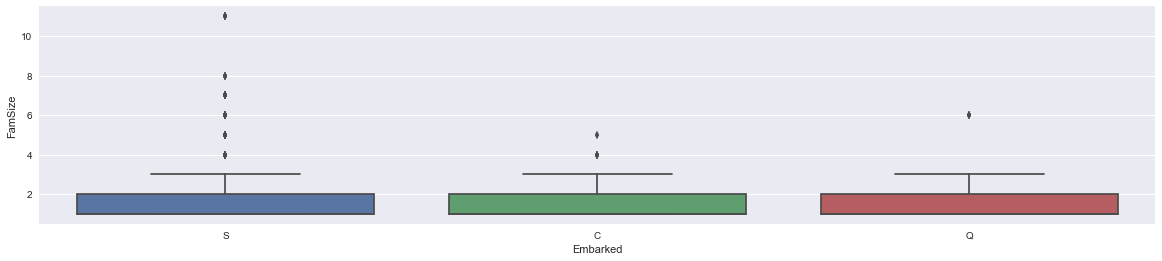

In [27]:
sns.boxplot(x = 'Embarked', y = 'FamSize', data = train)

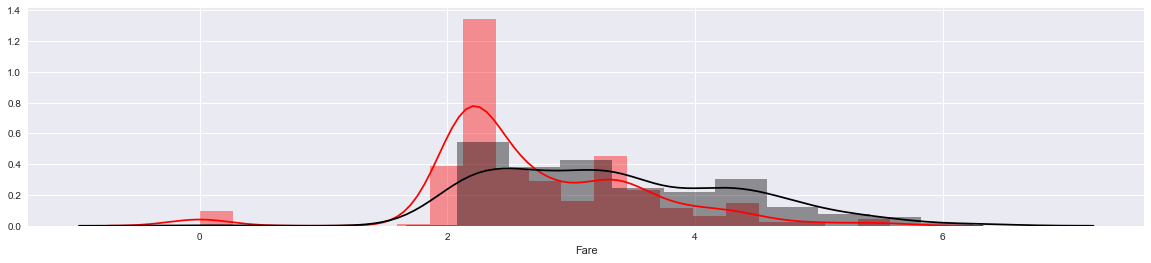

In [41]:
sns.distplot(np.log(train[train.Survived == 0].Fare + 1), color = 'Red') #Dead
sns.distplot(np.log(train[train.Survived == 1].Fare + 1), color = 'Black') #Alive

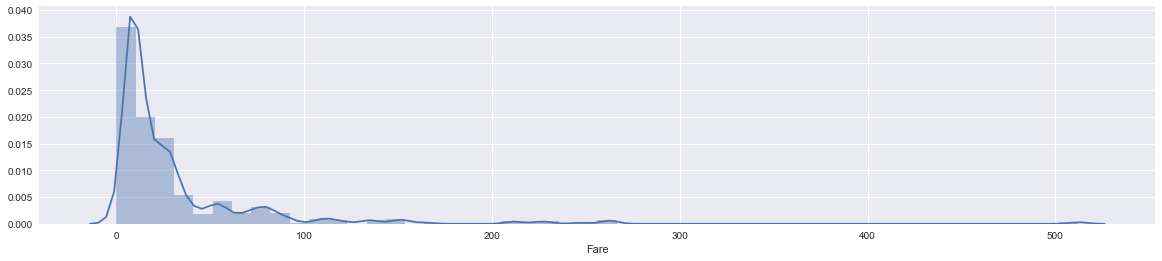

In [53]:
sns.distplot(train.Fare)

In [47]:
train['Age'] = train.Age.fillna(0)

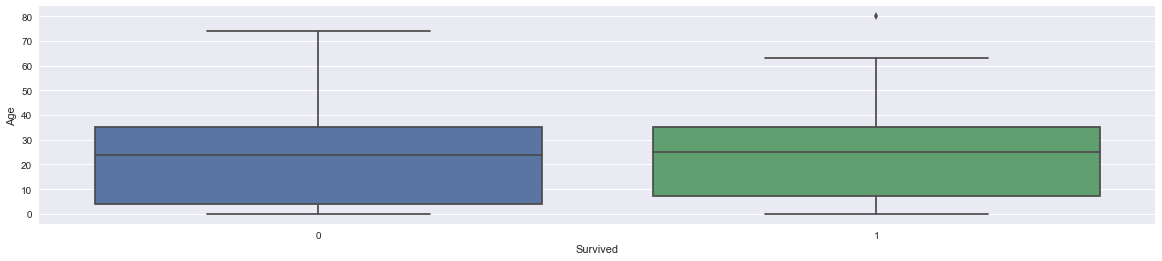

In [51]:
sns.boxplot(x = 'Survived', y = 'Age', data = train)

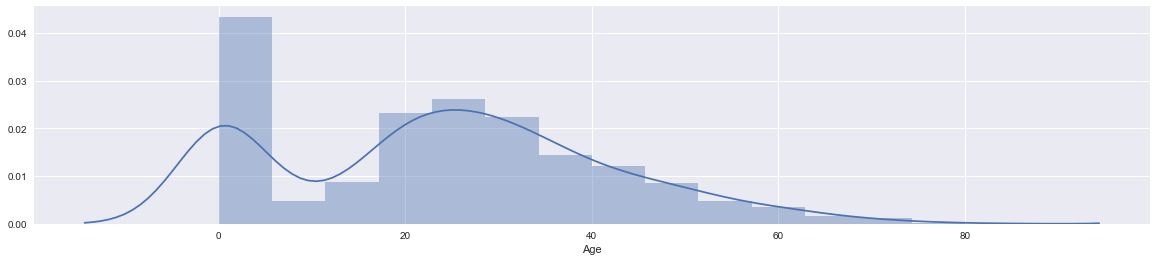

In [52]:
sns.distplot(train.Age)